In [36]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

In [37]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(30, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="darkblue")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.xticks(rotation="vertical")
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="darkblue")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'),labelspacing =1)
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")
    plt.xticks(rotation="vertical")
    plt.show()
    

### Read File

In [72]:
data_original=pd.read_csv("C:/Users/Madal/Downloads/donors.csv")

C:\Users\Madal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,412) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [73]:
#Create a copy
data = data_original.copy()

In [74]:
#drop the index "Unnamed"
data.drop(["Unnamed: 0"], axis=1, inplace= True)
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

In [75]:
data.columns                              

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'AVGGIFT', 'CONTROLN', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A',
       'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object', length=475)

In [76]:
data.dtypes.unique

<bound method Series.unique of ODATEDW     object
OSOURCE     object
TCODE        int64
STATE       object
ZIP         object
             ...  
RFA_2A      object
MDMAUD_R    object
MDMAUD_F    object
MDMAUD_A    object
GEOCODE2    object
Length: 475, dtype: object>

### Normalize Some Values and replacing empty String for Nans

In [77]:
Y_Values=["COLLECT1","VETERANS","BIBLE","CATLG","HOMEE","PETS","CDPLAY","STEREO","PCOWNERS","PHOTO","CRAFTS","FISHER","GARDENIN","BOATS","WALKER","KIDSTUFF","CARDS","PLATES"]
for i in Y_Values:
    data[i]=pd.Series(np.where(data[i].values == 'Y', 1, 0),data.index)
data[Y_Values]

COLLECT1  VETERANS  BIBLE  CATLG  HOMEE  PETS  CDPLAY  STEREO  \
0             0         0      0      0      0     0       0       0   
1             0         0      0      0      0     0       0       0   
2             0         0      0      0      0     0       0       0   
3             0         0      0      0      0     0       0       0   
4             0         0      1      1      0     0       0       1   
...         ...       ...    ...    ...    ...   ...     ...     ...   
95407         0         0      0      0      0     0       0       0   
95408         0         0      0      0      0     0       0       0   
95409         0         0      0      0      0     0       0       0   
95410         0         0      0      0      0     0       0       0   
95411         0         0      0      0      0     0       0       0   

       PCOWNERS  PHOTO  CRAFTS  FISHER  GARDENIN  BOATS  WALKER  KIDSTUFF  \
0             0      0       0       0         0      0       0         0   
1             0      0       0       0         0      0       0         0   
2             0      0       0       0         0      0       0         0   
3             0      0       0       0         0      0       0         0   
4             0      0       1       0         1      0       1         0   
...         ...    ...     ...     ...       ...    ...     ...       ...   
95407         0      0       0       0         0      0       0         0   
95408         0      0       0       0         0      0       0         0   
95409         0      0       0       0         0      0       0         0   
95410         0      0       0       0         0      0       0         0   
95411         0      0       0       0         0      0       0         0   

       CARDS  PLATES  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          1       0  
...      ...     ...  
95407      0       0  
95408      0       0  
95409      0       0  
95410      0       0  
95411      0       0  

[95412 rows x 18 columns]

In [78]:
X_values=["NOEXCH","RECINHSE","RECP3","RECPGVG","RECSWEEP","MAJOR","PEPSTRFL"]
for i in X_values:
    data[i]=pd.Series(np.where(data[i].values == 'X', 1, 0),data.index)
data[X_values]

NOEXCH  RECINHSE  RECP3  RECPGVG  RECSWEEP  MAJOR  PEPSTRFL
0           0         0      0        0         0      0         1
1           0         0      0        0         0      0         0
2           0         0      0        0         0      0         1
3           0         0      0        0         0      0         1
4           0         1      1        0         0      0         0
...       ...       ...    ...      ...       ...    ...       ...
95407       0         0      0        0         0      0         0
95408       0         0      0        0         0      0         0
95409       0         0      1        0         0      0         1
95410       0         1      0        0         0      0         1
95411       0         1      0        1         0      1         1

[95412 rows x 7 columns]

In [79]:
data["MAILCODE"]=pd.Series(np.where(data["MAILCODE"].values == 'B', 1, 0),data.index)

In [80]:
# replace " " by nans
data.replace(" ", np.nan, inplace=True)

### Dropping Columns with High percentege of missing values

In [81]:
#if a columns has more than half of missing values the column is removed
for i in data:
    if  data[i].isna().sum()/data.shape[0] >0.51:
        data.drop(i,axis=1,inplace=True)
print(data_original.shape[1]-data.shape[1],"columns were removed")

75 columns were removed


In [82]:
df= data['LASTDATE'].str.split("-",expand=True)
data['YEAR'] = df[0]
data['MONTH'] = df[1]
data["YEAR"]=data["YEAR"].astype(int)
data['MONTH'] = data['MONTH'].astype(int)
data["LDYears"] = 2017- data["YEAR"]

In [83]:
data['LDMonths'] = data["MONTH"] - 1
cv = data[["LDYears",'LDMonths']]
cv1 = cv[cv.LDYears < 2 ]
cv1 = cv1[cv1.LDYears > 0 ]
lapsedDonors = cv1[cv1.LDMonths < 12]

In [84]:
data['Lapsed Donor'] = np.where(data.index.isin(lapsedDonors.index), 'LD', 'NLD')

In [85]:
df= data['DOB'].str.split("-",expand=True)
data['YEARob'] = df[0]

In [86]:
data[data['YEARob'].isnull()]
data['YEARob'] = pd.to_numeric(data['YEARob'], errors='coerce')
data = data.dropna(subset=['YEARob'])
data['YEARob'] = data['YEARob'].astype(int)

In [87]:
data["AGE"] = 2017- data["YEARob"]

In [88]:
data["GENDER"].replace({' ':'U', 'C':'U','A':'U'}, inplace=True)

### Visualization

#### Pairwise Relationship of Demographic Variables

#### Demographic variables

In [101]:
demographic

GENDER Lapsed Donor  AGE  MAJOR  POBC1  POBC2  POP902  POP90C1  POP90C2  \
0          F          NLD   60      0      3     74     264        0       35   
1          M          NLD   45      0     42     39     940       99        0   
3          F          NLD   69      0     29     67     160        0        8   
4          F           LD   77      0      1     65     627       99        0   
6          F          NLD   37      0      0     77     245        0       99   
...      ...          ...  ...    ...    ...    ...     ...      ...      ...   
95406      F           LD   49      0      5     41     529        0        0   
95408      M           LD   47      0      2     51     322       96        0   
95409      M           LD   59      0      6     82     131       99        0   
95410      F          NLD   57      0     14     50     432       99        0   
95411      F           LD   79      1      1     48    1192       99        0   

       POP90C3  ...  SEC2  SEC3  SEC5  LSC1  LSC3  LSC4  MARR1  MARR2  MARR4  \
0           65  ...    20     3     4    88     0     4     61      7     19   
1            0  ...    24     4    10    50    27    16     69      4     24   
3           92  ...    19     1     0    56     3     0     63      9     23   
4            0  ...    26     1     7    99     0     0     42     17     33   
6            0  ...    13     2     4    99     1     1     55      8     19   
...        ...  ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
95406       99  ...    21     2     5    95     0     3     66     10     18   
95408        4  ...    35     5     7    94     0     2     73      4     20   
95409        0  ...    32     4     7    92     3     0     45     19     31   
95410        0  ...    29     4    10    83     4     5     56      9     27   
95411        0  ...    25     4     6    99     0     1     73      6     18   

        REGION  
0      MidWest  
1         West  
3         West  
4        South  
6      MidWest  
...        ...  
95406    South  
95408    South  
95409  MidWest  
95410     West  
95411    South  

[71529 rows x 24 columns]

In [92]:
demographic = data[["STATE","GENDER","Lapsed Donor","AGE","POBC1","POBC2","POP902","POP90C1","POP90C2","POP90C3","POP90C4",
                          "POP90C5","AGE901","SEC1","SEC2","SEC3","SEC5","LSC1","LSC3","LSC4","MARR1","MARR2","MARR4"]].copy()

In [93]:
demographic["REGION"]=demographic.STATE.replace(['HI','AK','CO','WY','MT','AZ','UT','ID','CA','NV','OR','WA'],'West')
demographic.REGION.replace(['TX','OK','AR','LA','MS','TN','KY','WV','VA','DE','MD','DC','NC','SC','GA','FL','AL'],'South',inplace=True)
demographic.REGION.replace(['KS','NE','SD','ND','MO','IA','MN','IL','WI','IN','OH','MI'],'MidWest',inplace=True)
demographic.REGION.replace(['PA','NJ','CT','RI','MA','NY','VT','NH','ME'],'NorthEast',inplace=True)
demographic.REGION.replace(['NM','AA'],np.nan,inplace=True)
demographic.REGION.replace(['NM','AP','AA','AE','GU','AS','VI'],np.nan,inplace=True)

In [100]:
demographic.drop(["STATE"],axis=1,inplace=True)

In [96]:
dem_metric_features = demographic.select_dtypes(include=["int16","int32","float64","int64"]).columns.to_list()

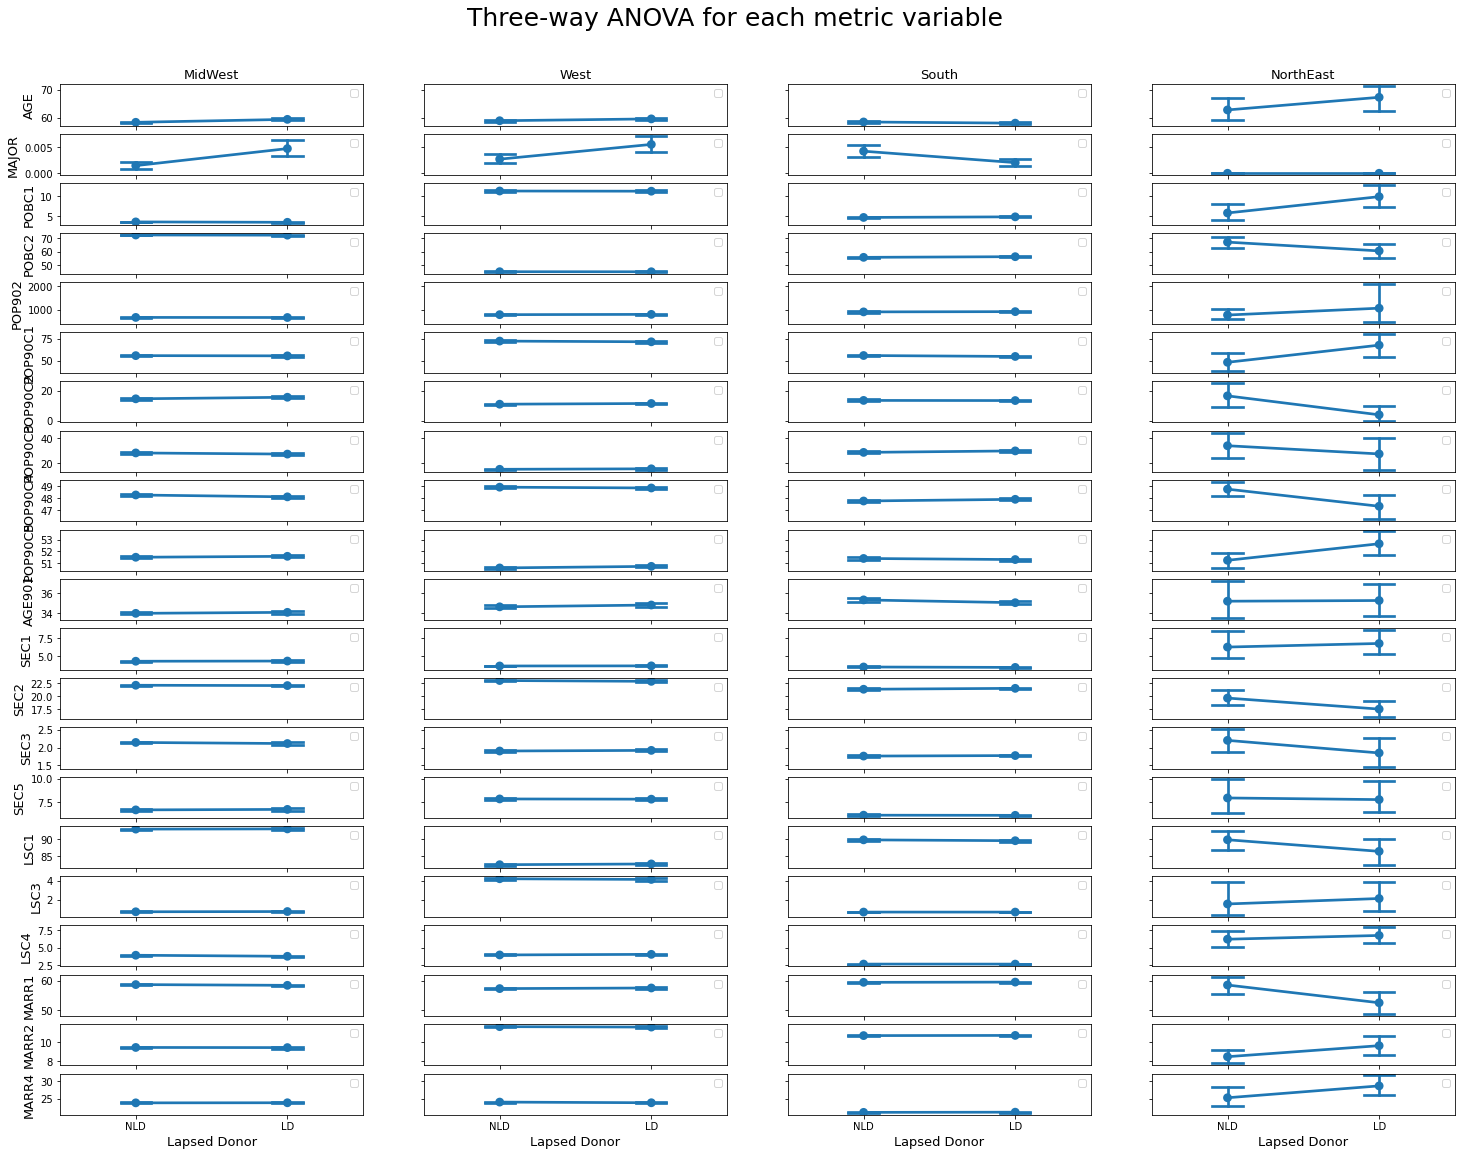

In [98]:
from itertools import product
region_vals = demographic.REGION.dropna().unique()
region_vals = region_vals

fig, axes = plt.subplots(len(dem_metric_features), len(region_vals), figsize=(25,18), sharex=True, sharey="row")

for ax, (feat, region_side) in zip(axes.flatten(), product(dem_metric_features, region_vals)):
    # get the data for each subplot
    data = demographic[demographic.REGION == region_side]
    
    # we are distinguishing points according to the variable "Major"
    sns.pointplot(x="Lapsed Donor", y=feat, data=data, capsize=.2,
             height=6, aspect=.75, ax=ax)
    
    # remove the typical default y and x labels and legend of each axis
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend('')

# set columns' titles (education)
for ax, label in zip(axes[0,:], region_vals):
    ax.set_title(label, fontsize=13)

# set metric names
for ax, label in zip(axes[:,0],dem_metric_features):
    ax.set_ylabel(label, fontsize=13)

# set x axis label (Lapsed Donor)
for ax in axes[-1,:]:
    ax.set_xlabel('Lapsed Donor', fontsize=13)


# set figure
plt.subplots_adjust(top=0.92)
plt.suptitle("Three-way ANOVA for each metric variable", fontsize=25)

plt.show()

<ipython-input-104-c826703883ba>:8: RuntimeWarning: invalid value encountered in greater_equal
  mask_annot = np.absolute(corr.values) >= 0.5


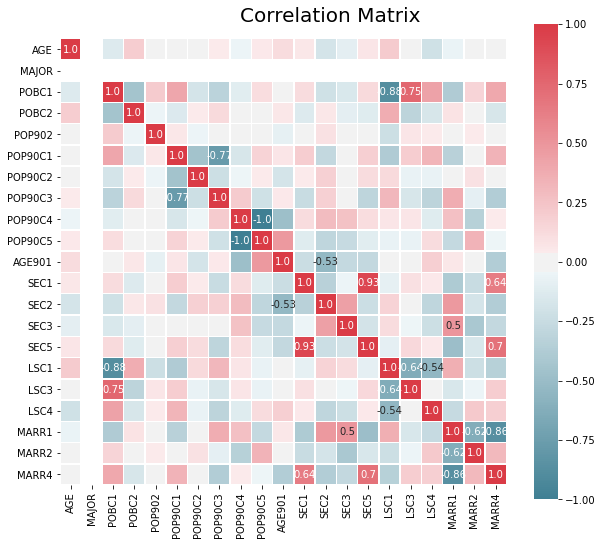

In [104]:
# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix. Round the values to 2 decimal cases. Use the DataFrame corr() and round() method.
corr = np.round(data[dem_metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) # Try to understand what this np.where() does

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

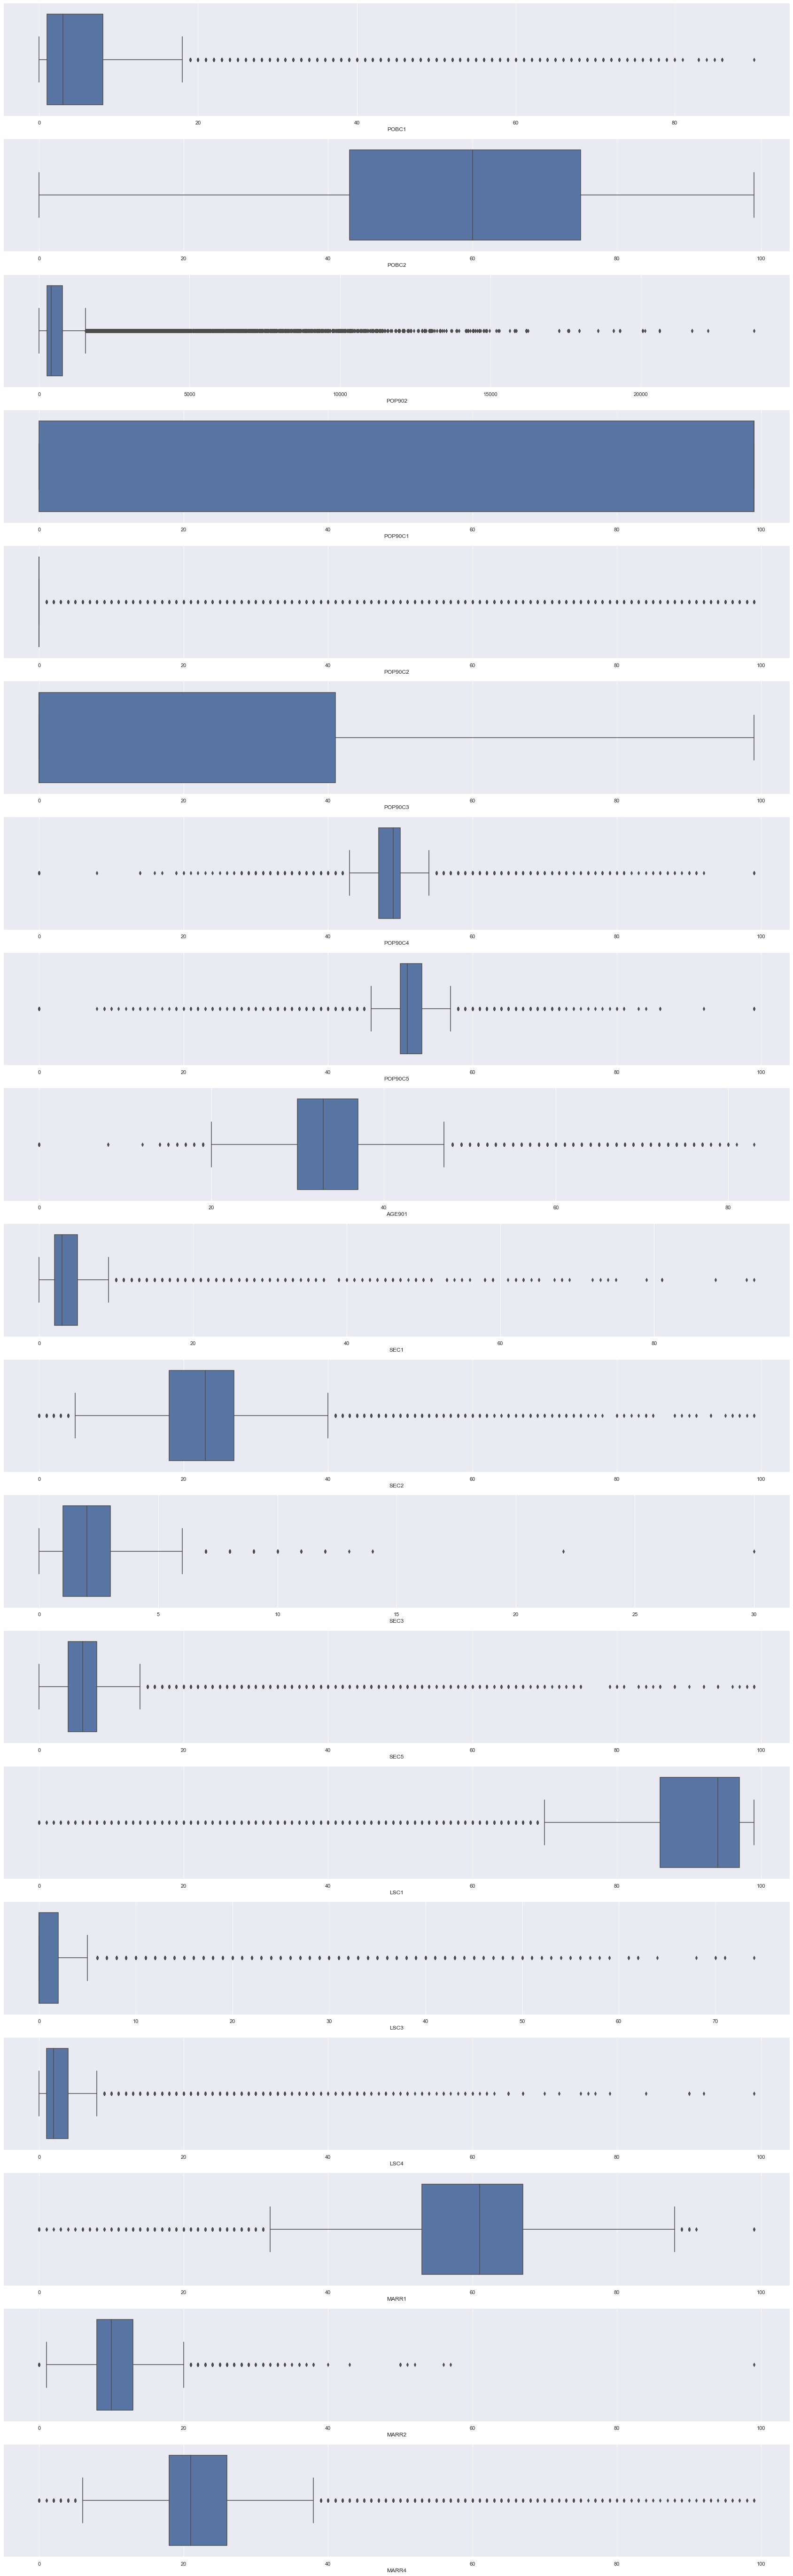

In [25]:
sns.set()
fig, axes = plt.subplots(len(dem_metric_features), ceil(len(dem_metric_features) / len(dem_metric_features)), figsize=(30, 100))
for ax, feat in zip(axes.flatten(), dem_metric_features):
    sns.boxplot(x=data[feat], ax=ax) 
plt.show()

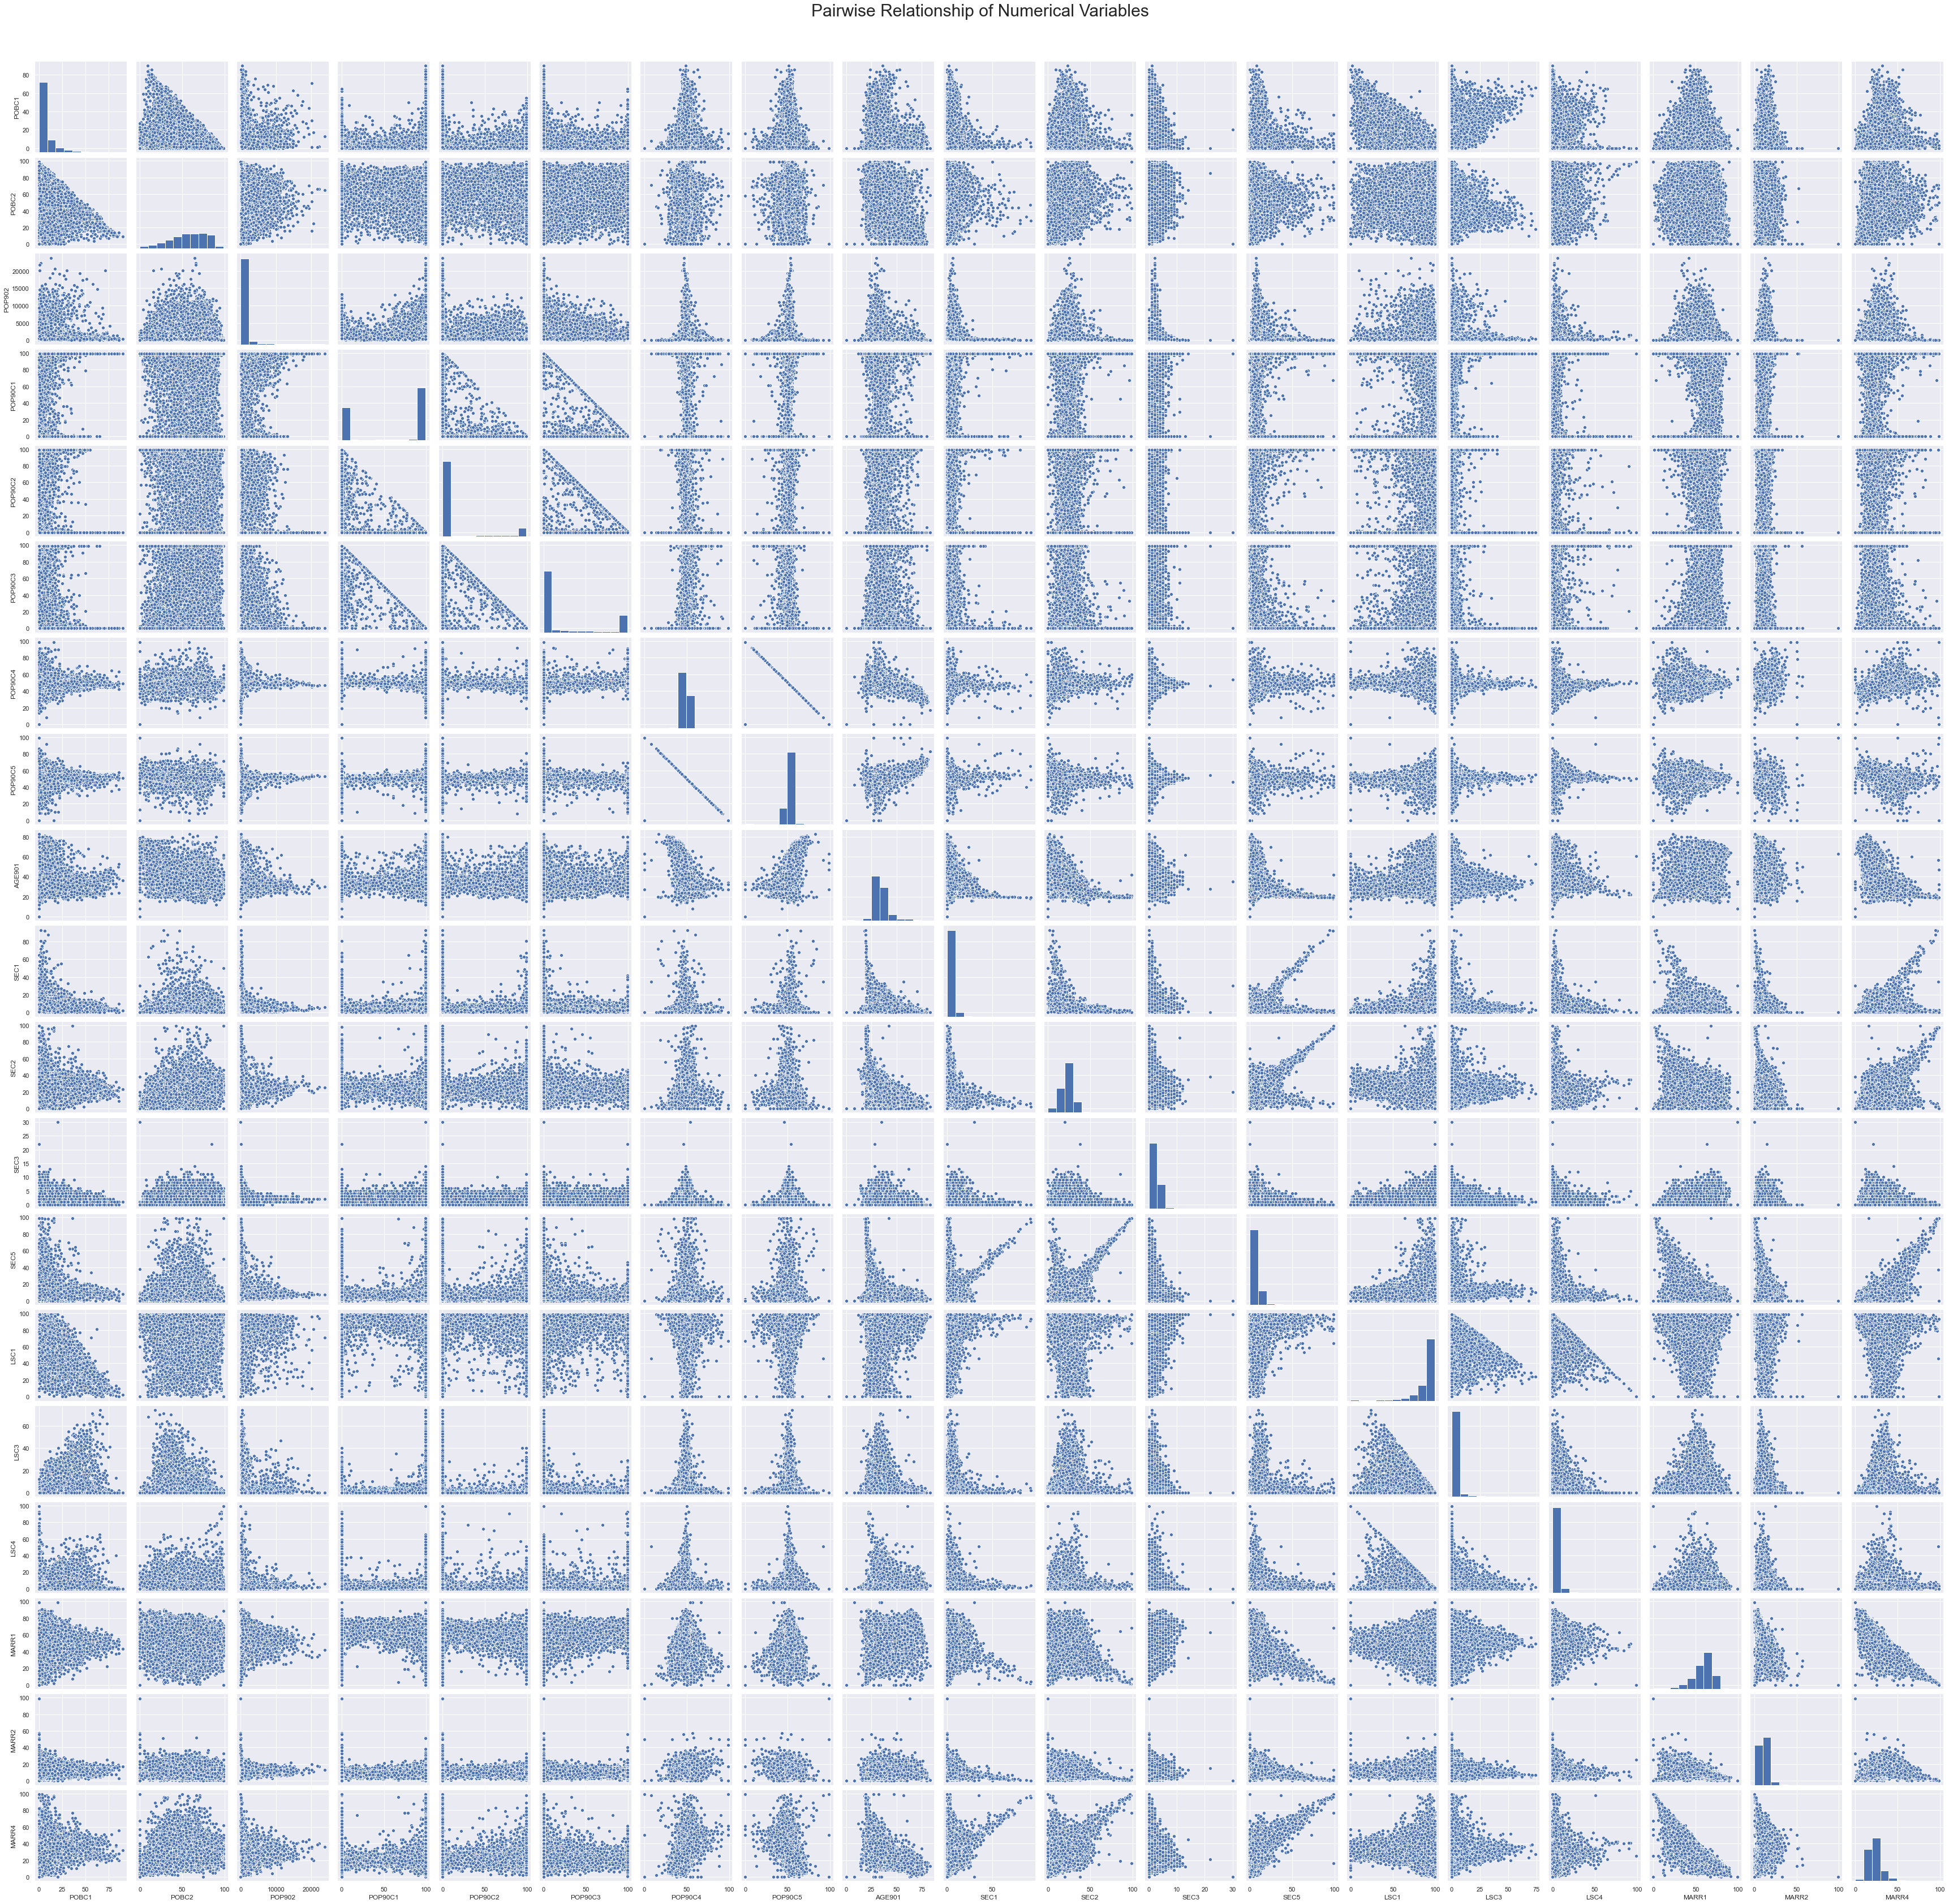

In [26]:
sns.set()
sns.pairplot(data[dem_metric_features], diag_kind="hist")
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=30)
plt.show()